In [ ]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/sample_data/WineQT.csv')   #데이터 가져오기

print(data)

In [ ]:
data.describe()

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 필요없는 열, 타켓열 제외 후 특성 설정
features = data.drop(['quality', 'Id', 'free sulfur dioxide', 'fixed acidity', 'residual sugar'], axis=1)

# 목표 변수 선택
target = data['quality']

# 데이터 표준화
ss=StandardScaler()
scaled_features = ss.fit_transform(features)  # 데이터 스케일링

# 학습, 평가, 검증 데이터셋 분할
train_input, test_input, train_target, test_target = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.5, random_state=42)


In [71]:
#데이터 세트 표준화
ss.fit(train_input)

trian_scaled = ss.transform(train_input)
val_scaled = ss.transform(val_input)
test_scaled = ss.transform(test_input)

In [72]:
from sklearn.linear_model import LogisticRegression   #로지스틱 회귀

lr=LogisticRegression()
lr.fit(trian_scaled,train_target)
print(lr.score(trian_scaled, train_target))
print(lr.score(test_scaled,test_target))

0.5925
0.6384839650145773


In [54]:
print(lr.coef_,lr.intercept_)

[[ 1.03135268  0.0972232   0.35066885 -0.50014024  0.29063545  0.24654076
  -0.40076814 -1.22590835]
 [ 0.27886243 -0.08773677  0.44698728  0.21645158  0.09712584  0.52619645
  -0.27460831 -0.45522181]
 [-0.02844732 -0.30933978  0.04025942  0.82112561  0.09075446 -0.31636761
  -0.53803611 -0.63540385]
 [-0.35461643 -0.13256988 -0.12788744  0.30458304  0.09197044 -0.2166095
  -0.14386326  0.09675758]
 [-0.85211411  0.05267449 -0.2052836   0.05366305  0.10482347 -0.21370784
   0.29925692  0.98962975]
 [-0.07503725  0.37974874 -0.50474452 -0.89568304 -0.67530966 -0.02605225
   1.0580189   1.23014668]] [-2.7392157  -0.23393592  2.63087577  2.76285868  0.5816728  -3.00225562]


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 로지스틱 회귀
lr = LogisticRegression(max_iter=1000) # 매개변수 설정 1000번 반복

# 모델 학습
lr.fit(train_input, train_target)

# 데이터 세트에서 모델 평가
train_score = lr.score(train_input, train_target)
val_score = lr.score(val_input, val_target)
logistic_test_score = lr.score(test_input, test_target)

훈련 : 0.5925, 검증 : 0.6025, 평가 : 0.6384839650145773


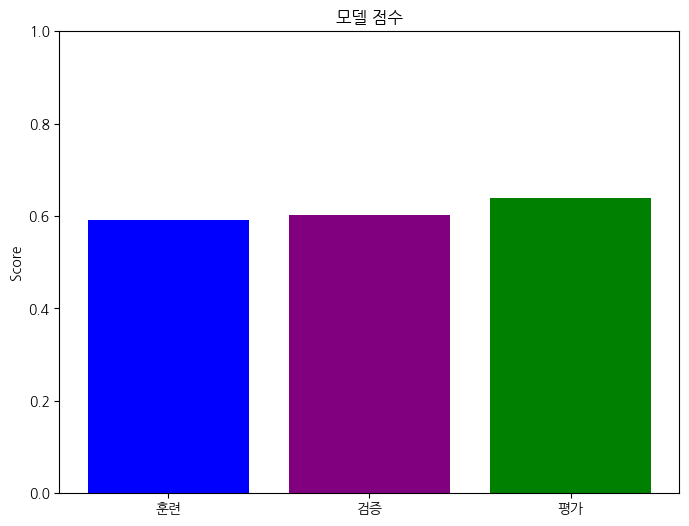

In [74]:
import matplotlib.pyplot as plt

#학습, 검증, 평가 데이터 점수
scores = [train_score, val_score, logistic_test_score]
labels = ['훈련', '검증', '평가']

print(f"훈련 : {train_score}, 검증 : {val_score}, 평가 : {logistic_test_score}")

# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'purple', 'green'])
plt.ylabel('Score')
plt.title('모델 점수')
plt.ylim(0, 1)
plt.show()

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# 랜덤 포레스트
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True, return_estimator=True, n_jobs=-1)

# 각 폴드의 훈련 및 검증 세트의 평균 점수 계산
train_scores = scores['train_score']
test_scores = scores['test_score']
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

rf.fit(train_input, train_target)
print(rf.feature_importances_)  #특성 중요도 표시


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


1.0 0.6025
[0.13384305 0.11571327 0.10805092 0.12857827 0.11323253 0.10448594
 0.13739755 0.15869847]


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import numpy as np

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)


0.6075


In [104]:
# 데이터 세트에서 모델 평가
train_score = rf.score(train_input, train_target)
val_score = rf.score(val_input, val_target)
random_test_score = rf.score(test_input, test_target)

현재 과적합이 발생했습니다. 데이터가 잘 안섞이거나 특성을 줄임에도 점수가 잘 나오지 않습니다.

훈련 : 1.0, 검증 : 0.6025, 평가 : 0.60932944606414


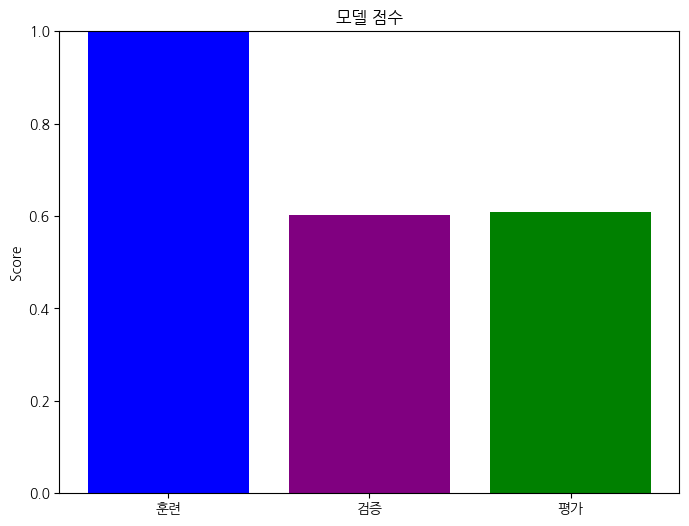

In [105]:
import matplotlib.pyplot as plt

#학습, 검증, 평가 데이터 점수
scores = [train_score, val_score, random_test_score]
labels = ['훈련', '검증', '평가']

print(f"훈련 : {train_score}, 검증 : {val_score}, 평가 : {random_test_score}")

# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'purple', 'green'])
plt.ylabel('Score')
plt.title('모델 점수')
plt.ylim(0, 1)
plt.show()

In [ ]:
%pip install --upgrade tensorflow
%pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sequential 모델 생성
model = Sequential()

# 모델에 레이어 추가
model.add(Dense(256, input_dim=train_input.shape[1], activation='relu'))  # 입력 레이어
model.add(Dense(128, activation='relu'))  # 은닉 레이어 1
model.add(Dense(64, activation='relu'))   # 은닉 레이어 2
model.add(Dense(10, activation='softmax'))  # 출력 레이어

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 epochs = 50이 적절한 하이퍼파라미터
history = model.fit(test_input, test_target, epochs=50, batch_size=32, validation_data=(val_input, val_target), verbose=0)



In [109]:
# 각 데이터에 대한 모델 평가
train_score = model.evaluate(train_input, train_target, verbose=0)[1]
val_score = model.evaluate(val_input, val_target, verbose=0)[1]
Sequential_test_score = model.evaluate(test_input, test_target, verbose=0)[1]

# 학습, 검증, 평가 데이터 점수
scores = [train_score, val_score, Sequential_test_score]
labels = ['훈련', '검증', '평가']


In [110]:
# 점수 출력
print(f"훈련 : {train_score}, 검증 : {val_score}, 평가 : {Sequential_test_score}")

훈련 : 0.550000011920929, 검증 : 0.5774999856948853, 평가 : 0.9300291538238525


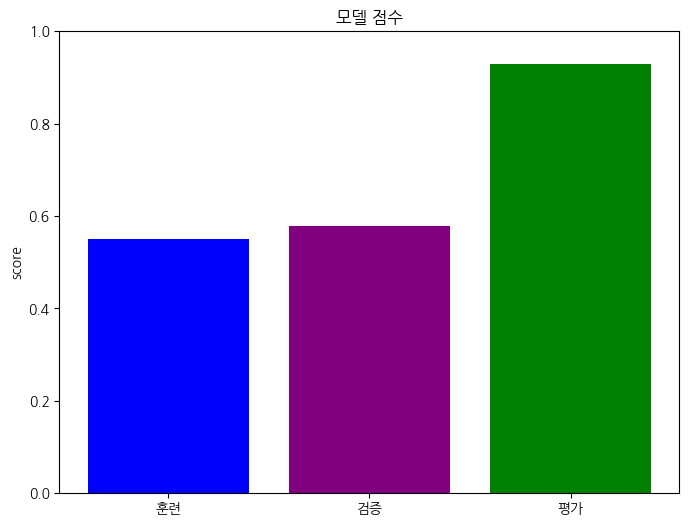

In [112]:
# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'purple', 'green'])
plt.ylabel('score')
plt.title('모델 점수')
plt.ylim(0, 1)
plt.show()

In [113]:
# 로지스틱, 랜덤포레스트, 인공신경망
scores = [logistic_test_score, random_test_score, Sequential_test_score]
labels = ['로지스틱', '랜덤포레스트', '인공신경망']

인공 신경망 모델이 제일 우수

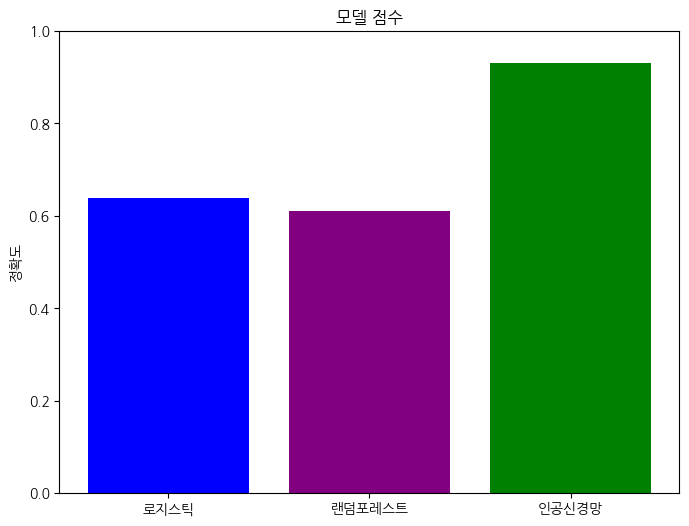

In [114]:
# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'purple', 'green'])
plt.ylabel('정확도')
plt.title('모델 점수')
plt.ylim(0, 1)
plt.show()